# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import requests
import json
import time
from pprint import pprint

# Data Science
import pandas as pd
import numpy as np
import scipy.stats as sc

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | severnoye
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | karratha
Processing Record 6 of Set 1 | asenovgrad
Processing Record 7 of Set 1 | anadyr
Processing Record 8 of Set 1 | gunnedah
Processing Record 9 of Set 1 | merelani
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | colonia
Processing Record 12 of Set 1 | dunedin
Processing Record 13 of Set 1 | tevriz
Processing Record 14 of Set 1 | kiunga
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | general mosconi
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | zeya
Processing Record 19 of Set 1 | asuncion nochixtlan
Processing Record 20 of Set 1 | camana
Processing Record 21 of Set 1 | kumru
Processing Record 22 of Set 1 | kone
Processing Record 23 of Set 1 | pi

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,13.79,99,98,4.02,NZ,1736808255
1,severnoye,56.3491,78.3619,-10.73,87,99,5.51,RU,1736808256
2,grytviken,-54.2811,-36.5092,5.89,69,93,6.41,GS,1736808103
3,invercargill,-46.4000,168.3500,13.90,82,56,0.89,NZ,1736808178
4,karratha,-20.7377,116.8463,25.63,83,100,6.23,AU,1736808259


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.79,99,98,4.02,NZ,1736808255
1,severnoye,56.3491,78.3619,-10.73,87,99,5.51,RU,1736808256
2,grytviken,-54.2811,-36.5092,5.89,69,93,6.41,GS,1736808103
3,invercargill,-46.4000,168.3500,13.90,82,56,0.89,NZ,1736808178
4,karratha,-20.7377,116.8463,25.63,83,100,6.23,AU,1736808259


In [10]:
# Date Cleaning w/dates
city_data_df["Date"] = pd.to_datetime(city_data_df.Date * 1e9)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.79,99,98,4.02,NZ,2025-01-13 22:44:15
1,severnoye,56.3491,78.3619,-10.73,87,99,5.51,RU,2025-01-13 22:44:16
2,grytviken,-54.2811,-36.5092,5.89,69,93,6.41,GS,2025-01-13 22:41:43
3,invercargill,-46.4000,168.3500,13.90,82,56,0.89,NZ,2025-01-13 22:42:58
4,karratha,-20.7377,116.8463,25.63,83,100,6.23,AU,2025-01-13 22:44:19


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

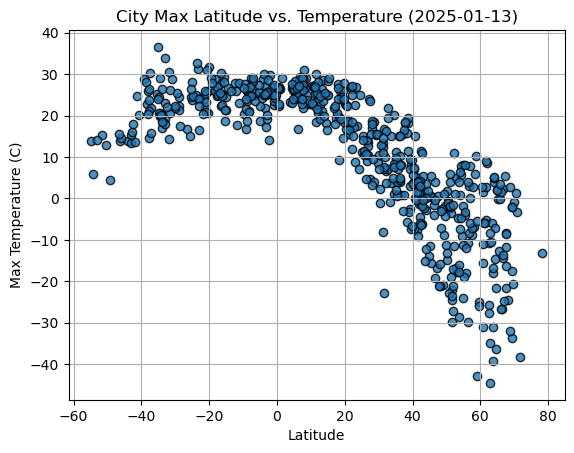

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

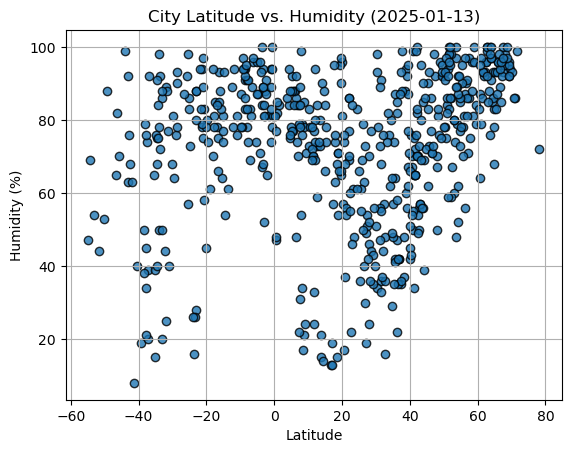

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

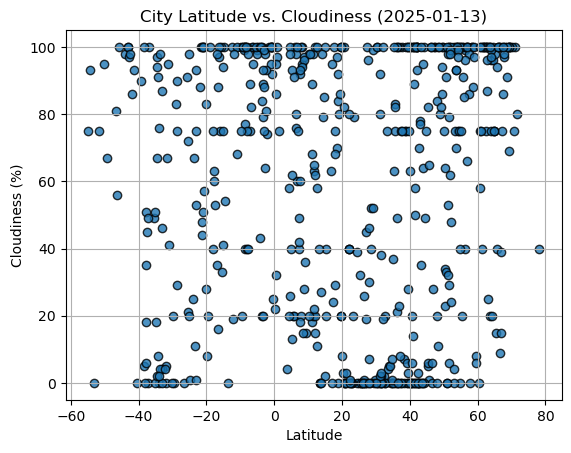

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

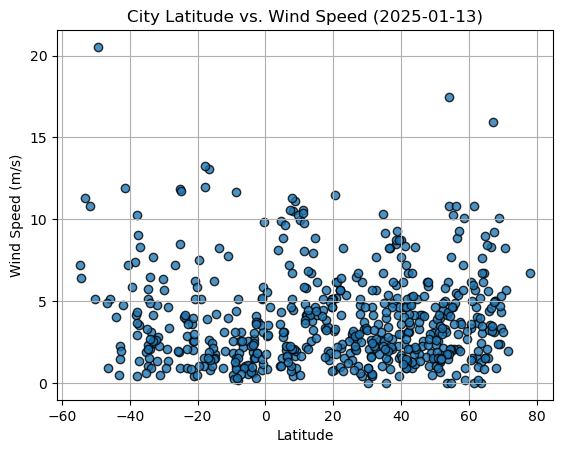

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def do_regression_plot(x_values, y_values, x_label, y_label, annotation, color):  
    # do regression
    (slope, intercept, rvalue, pvalue, stderr) = sc.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # these are the points/predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(rvalue)
    print(line_eq)

    # make a scatter plot

    # Change Canvas Size
    plt.figure(figsize=(12, 6))
    
    # Create a basic plot
    plt.scatter(x_values, y_values, color={color}, edgecolor="black", s=200)
    plt.plot(x_values, regress_values, color="black", linewidth=6) # the regression line
    
    # Incorporate the other graph properties
    # Add in reference lines
    # Add Labels/Title
    plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
    plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")

    # Annotate
    plt.annotate(line_eq, annotation, fontsize=15, color="black")
    
    # Show plot
    plt.show()

In [16]:
 # Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,severnoye,56.3491,78.3619,-10.73,87,99,5.51,RU,2025-01-13 22:44:16
5,asenovgrad,42.0167,24.8667,-1.29,100,100,1.03,BG,2025-01-13 22:44:20
6,anadyr,64.7500,177.4833,-21.67,83,75,9.00,RU,2025-01-13 22:44:21
10,colonia,50.9333,6.9500,-2.25,84,0,2.57,DE,2025-01-13 22:44:26
12,tevriz,57.5090,72.4042,-8.87,86,86,3.75,RU,2025-01-13 22:44:28


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.79,99,98,4.02,NZ,2025-01-13 22:44:15
2,grytviken,-54.2811,-36.5092,5.89,69,93,6.41,GS,2025-01-13 22:41:43
3,invercargill,-46.4000,168.3500,13.90,82,56,0.89,NZ,2025-01-13 22:42:58
4,karratha,-20.7377,116.8463,25.63,83,100,6.23,AU,2025-01-13 22:44:19
7,gunnedah,-30.9833,150.2500,28.86,40,41,0.50,AU,2025-01-13 22:44:23


###  Temperature vs. Latitude Linear Regression Plot

-0.8264789463334036
y = -0.98x + 42.54


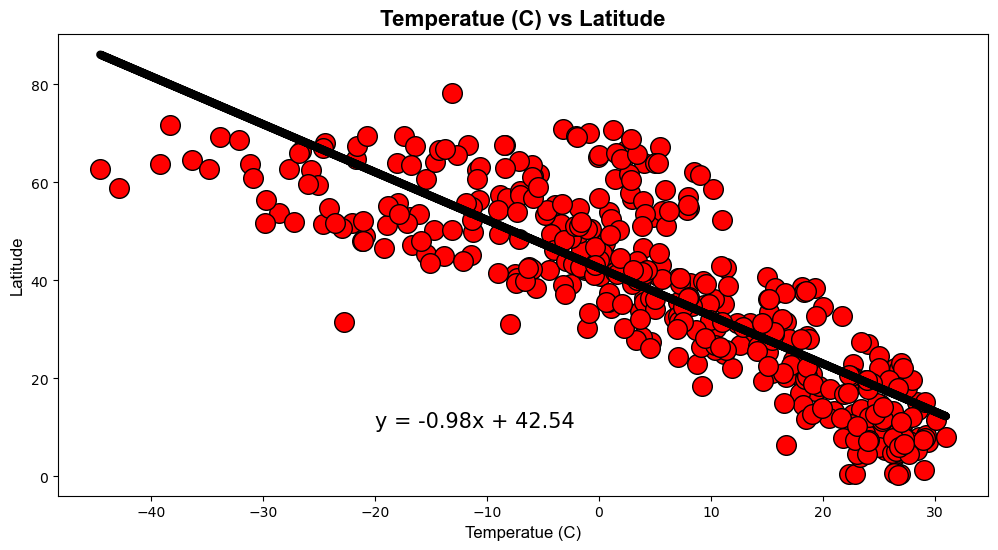

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Max Temp"]
y_values = northern_hemi_df.Lat
x_label = "Temperatue (C)"
y_label = "Latitude"
annotation = (-20, 10)
color = "red"

do_regression_plot(x_values, y_values, x_label, y_label, annotation, color)

0.4474309221196048
y = 1.27x + -50.71


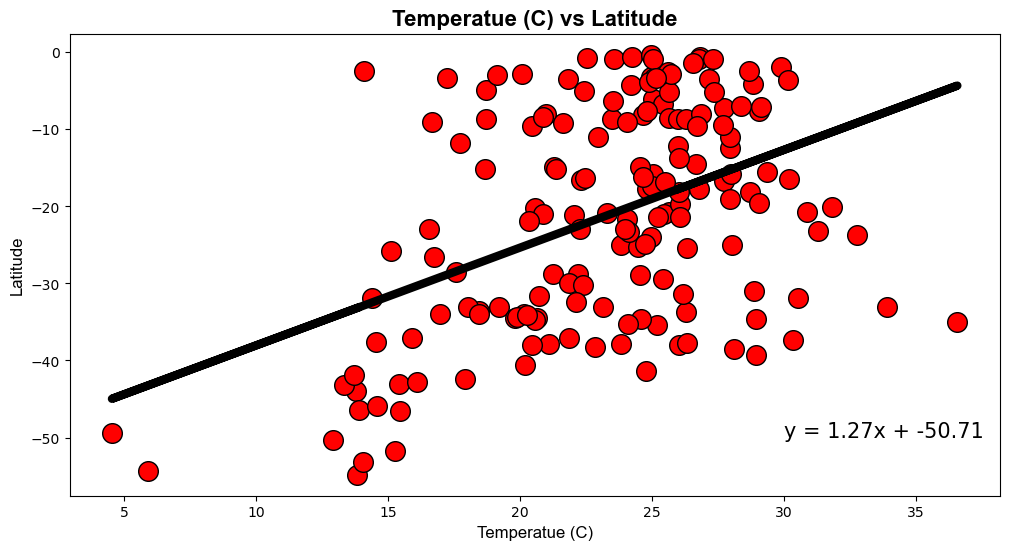

In [20]:
 # Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Max Temp"]
y_values = southern_hemi_df.Lat
x_label = "Temperatue (C)"
y_label = "Latitude"
annotation = (30, -50)
color = "red"

do_regression_plot(x_values, y_values, x_label, y_label, annotation, color)

**Discussion about the linear relationship:**  Both plots shows that when temperature increases, distance from the equator approaches 0.

### Humidity vs. Latitude Linear Regression Plot

0.39341531205108904
y = 0.36x + 11.54


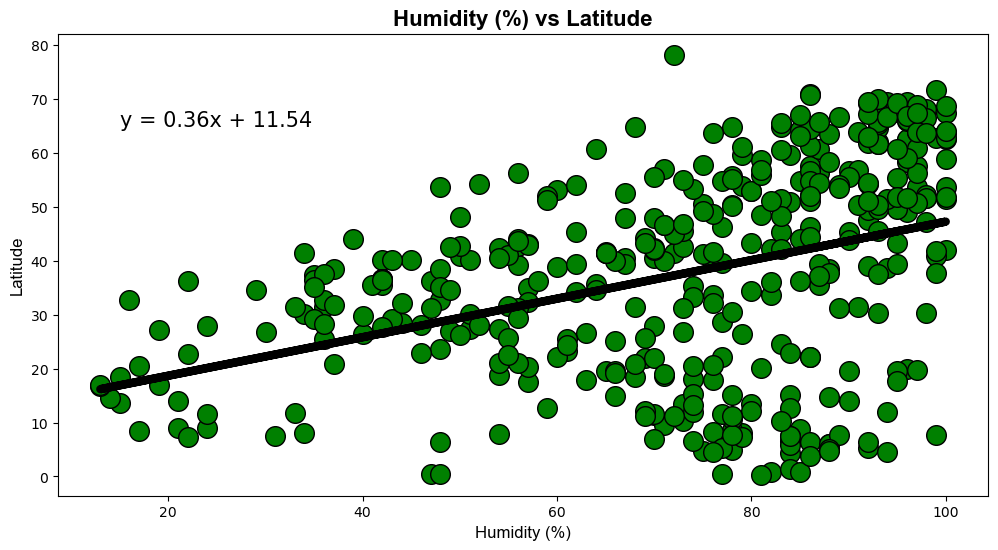

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df.Humidity
y_values = northern_hemi_df.Lat
x_label = "Humidity (%)"
y_label = "Latitude"
annotation = (15, 65)
color = "green"

do_regression_plot(x_values, y_values, x_label, y_label, annotation, color)

0.45087025006976655
y = 0.31x + -44.44


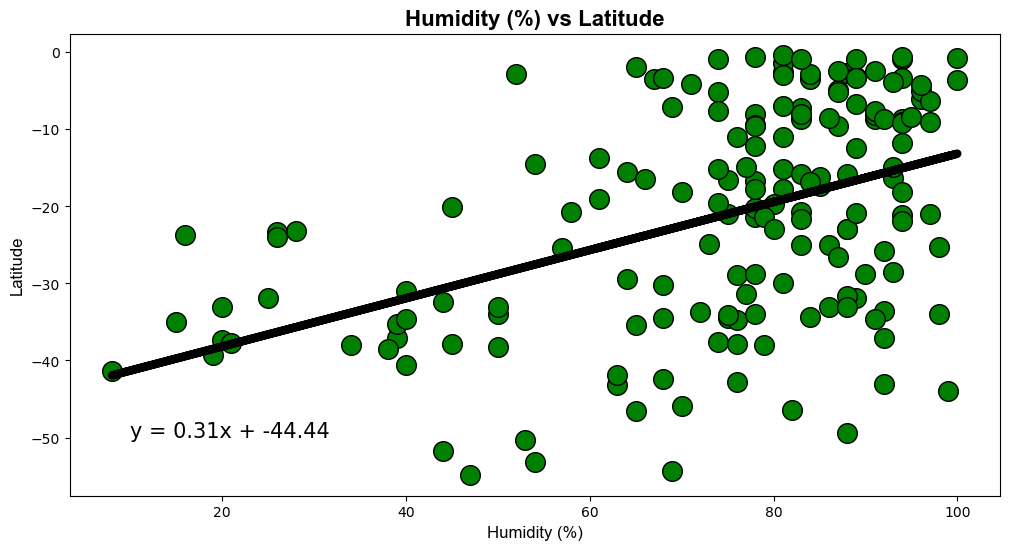

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df.Humidity
y_values = southern_hemi_df.Lat
x_label = "Humidity (%)"
y_label = "Latitude"
annotation = (10, -50)
color = "green"

do_regression_plot(x_values, y_values, x_label, y_label, annotation, color)

**Discussion about the linear relationship:** correlation is weak between humidity and lattitude

### Cloudiness vs. Latitude Linear Regression Plot

0.23651816756724564
y = 0.11x + 31.19


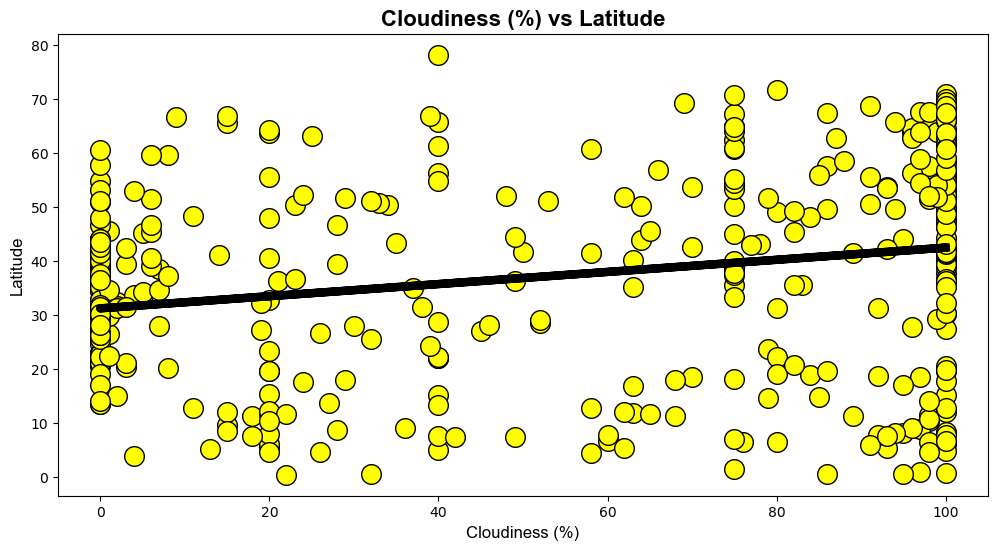

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df.Cloudiness
y_values = northern_hemi_df.Lat
x_label = "Cloudiness (%)"
y_label = "Latitude"
annotation = (-55, 20)
color = "yellow"

do_regression_plot(x_values, y_values, x_label, y_label, annotation, color)

0.3038388604553691
y = 0.12x + -29.14


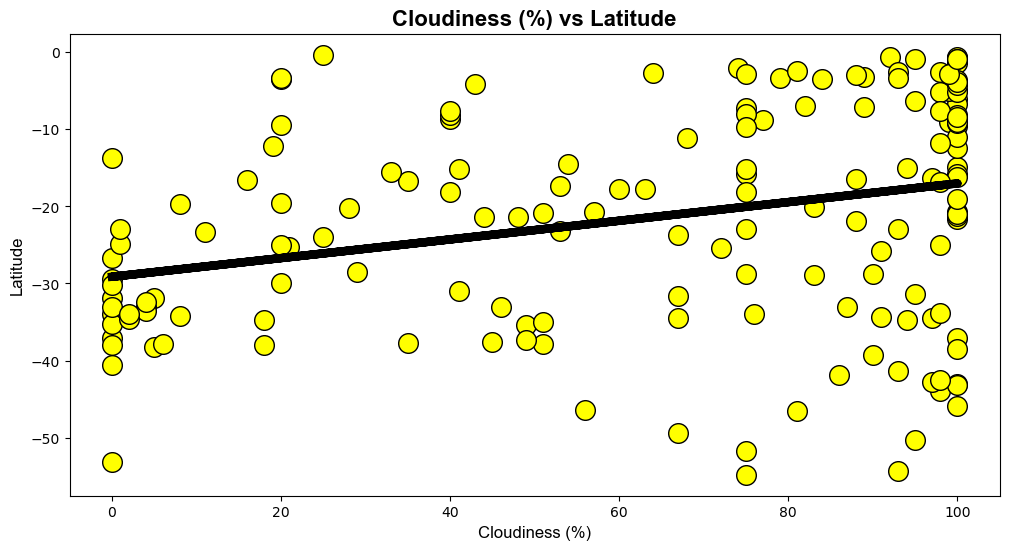

In [25]:
 # Southern Hemisphere
x_values = southern_hemi_df.Cloudiness
y_values = southern_hemi_df.Lat
x_label = "Cloudiness (%)"
y_label = "Latitude"
annotation = (-55, 20)
color = "yellow"

do_regression_plot(x_values, y_values, x_label, y_label, annotation, color)

**Discussion about the linear relationship:** There is a stronger correlation between cloudiness and latitude in the northern hemisphere than there is in the south. Cloudiness tends to cluster around either 0% or 100%.

### Wind Speed vs. Latitude Linear Regression Plot

-0.004065710179796681
y = -0.03x + 37.49


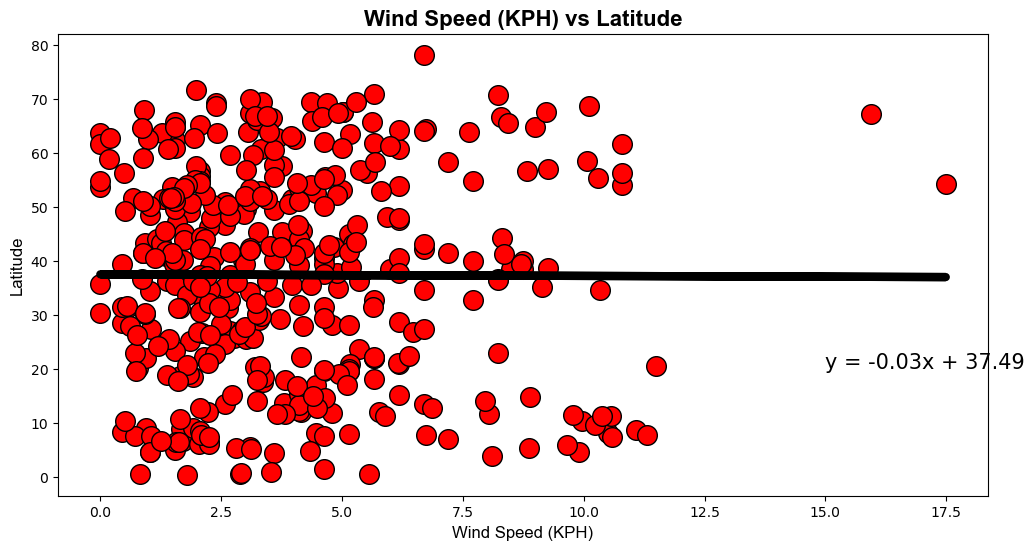

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Wind Speed"]
y_values = northern_hemi_df.Lat
x_label = "Wind Speed (KPH)"
y_label = "Latitude"
annotation = (15, 20)
color = "red"

do_regression_plot(x_values, y_values, x_label, y_label, annotation, color)

-0.3068225466370182
y = -1.37x + -16.32


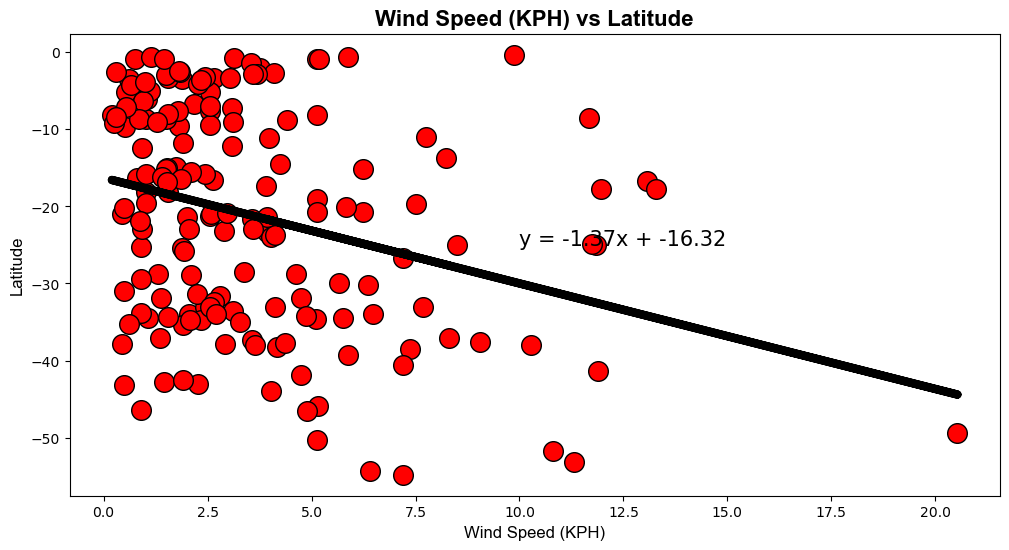

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Wind Speed"]
y_values = southern_hemi_df.Lat
x_label = "Wind Speed (KPH)"
y_label = "Latitude"
annotation = (10, -25)
color = "red"

do_regression_plot(x_values, y_values, x_label, y_label, annotation, color)

**Discussion about the linear relationship:** 